In [1]:
import numpy as np
import matplotlib.pyplot as plt

import data.data as data
import data.acf as acf
import error.error as error
import reservoir.reservoir as res

In [2]:
ROESSLER_LYAPUNOV = 1
DEL_T = 0.01
STEPS = 10000
WASHOUT = 3000

In [3]:
seeds = range(1, 200)
initial_states = [
    list(np.random.RandomState(seed).uniform(-5, 5, 3))
    for seed in seeds
]
initial_states

[[-0.8297799529742598, 2.2032449344215808, -4.998856251826551],
 [-0.6400509785799624, -4.740737681721087, 0.49662477878709144],
 [0.5079790257457546, 2.081478226181048, -2.0909526108705565],
 [4.670298390136766, 0.4723224917572235, 4.726843599648843],
 [-2.780068289102605, 3.7073230617737636, -2.932808446605736],
 [3.9286015143600164, -1.6802019469882277, 3.212291230578318],
 [-4.236917106260428, 2.7991879224011464, -0.6159076855910648],
 [3.7342940279181622, 4.68540662820932, 3.691945402139199],
 [-4.896258461143001, 0.01874592148738774, -0.04226706865853913],
 [2.7132064326674596, -4.792480506405985, 1.336482349262754],
 [-3.197303111232308, -4.805247585123754, -0.3678147350165535],
 [-3.4583715762032763, 2.4004969651540478, -2.3668498481486533],
 [2.7770241057382012, -2.624587799650877, 3.242785326613685],
 [0.1394334377269022, 2.731650520792968, 3.704276857248127],
 [3.488176972685787, -3.211040750790015, -4.456367856935685],
 [-2.7670892084646113, 0.23163341400676085, 0.507014565

In [4]:
u_all = []
for u_0 in initial_states:
    u_all.append(data.generate_roessler(initial_state=u_0, del_t=DEL_T, steps=STEPS, washout=WASHOUT))

In [6]:
time_all = []
acfs_all = []
preds_all = []
rmse_all = []

i = 0
while i < len(u_all):
    u = u_all[i]
    seed = seeds[i]

    T = u.shape[0]
    time = np.arange(T) * DEL_T * ROESSLER_LYAPUNOV
    acfs = acf.compute_acfs(u, "x", "x")
    W_out, r, A, W_in = res.train_p(u, rho=0.1, s_in=1, R=500, beta=10e-4, seed=seed)
    preds = res.predict(u[0], W_out, T, A, W_in)

    time_all.append(time)
    acfs_all.append(acfs)
    preds_all.append(preds)
    rmse_all.append(error.RMSE(u, preds))

    print("{} / {} done".format(i+1, len(u_all)))
    i += 1

/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:89: ComplexWarning: Casting complex values to real discards the imaginary part
  r[t] = next_res(
/Users/leoli/Desktop/uni/Honours/thesis-code/reservoir/reservoir.py:152: ComplexWarning: Casting complex values to real discards the imaginary part
  u_hat[t] = W_out(curr_res, p)


1 / 199 done
2 / 199 done
3 / 199 done
4 / 199 done
5 / 199 done
6 / 199 done
7 / 199 done
8 / 199 done
9 / 199 done
10 / 199 done
11 / 199 done
12 / 199 done
13 / 199 done
14 / 199 done
15 / 199 done
16 / 199 done
17 / 199 done
18 / 199 done
19 / 199 done
20 / 199 done
21 / 199 done
22 / 199 done
23 / 199 done
24 / 199 done
25 / 199 done
26 / 199 done
27 / 199 done
28 / 199 done
29 / 199 done
30 / 199 done
31 / 199 done
32 / 199 done
33 / 199 done
34 / 199 done
35 / 199 done
36 / 199 done
37 / 199 done
38 / 199 done
39 / 199 done
40 / 199 done
41 / 199 done
42 / 199 done
43 / 199 done
44 / 199 done
45 / 199 done
46 / 199 done
47 / 199 done
48 / 199 done
49 / 199 done
50 / 199 done
51 / 199 done
52 / 199 done
53 / 199 done
54 / 199 done
55 / 199 done
56 / 199 done
57 / 199 done
58 / 199 done
59 / 199 done
60 / 199 done
61 / 199 done
62 / 199 done
63 / 199 done
64 / 199 done
65 / 199 done
66 / 199 done
67 / 199 done
68 / 199 done
69 / 199 done
70 / 199 done
71 / 199 done
72 / 199 done
7

In [7]:
rmse_all = np.array(rmse_all)

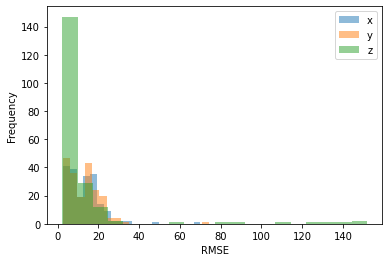

In [8]:
plt.figure(facecolor="white")
plt.hist(rmse_all[:, 0], bins=20, alpha=0.5, label="x")
plt.hist(rmse_all[:, 1], bins=20, alpha=0.5, label="y")
plt.hist(rmse_all[:, 2], bins=20, alpha=0.5, label="z")

plt.xlabel("RMSE")
plt.ylabel("Frequency")

plt.legend()

In [9]:
print(np.mean(rmse_all[:, 0]))
print(np.mean(rmse_all[:, 1]))
print(np.mean(rmse_all[:, 2]))

13.056006437421782
12.916629457686135
13.139649175975745


In [10]:
print(np.var(rmse_all[:, 0]))
print(np.var(rmse_all[:, 1]))
print(np.var(rmse_all[:, 2]))

68.36110105425676
65.26917720738962
558.4454629789377
